# Titanic Survivor Challenge

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Dataset available in Kaggle :- https://www.kaggle.com/c/titanic/overview


## Data Access

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

# Data Dictionary

* Variable	Definition	Key
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
* Variable Notes
* pclass: A proxy for socio-economic status (SES)
  1st = Upper
  2nd = Middle
  3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)
 
* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
          Some children travelled only with a nanny, therefore parch=0 for them.

In [221]:
# Tools imported

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models utilized

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# Model Evaluation utlized 

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.feature_selection import SelectKBest,chi2


In [271]:
# importing training dataset 

df = pd.read_csv("./data/train.csv")

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [224]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [153]:
# To find the corelation between the independent variables

corr_matrix = df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


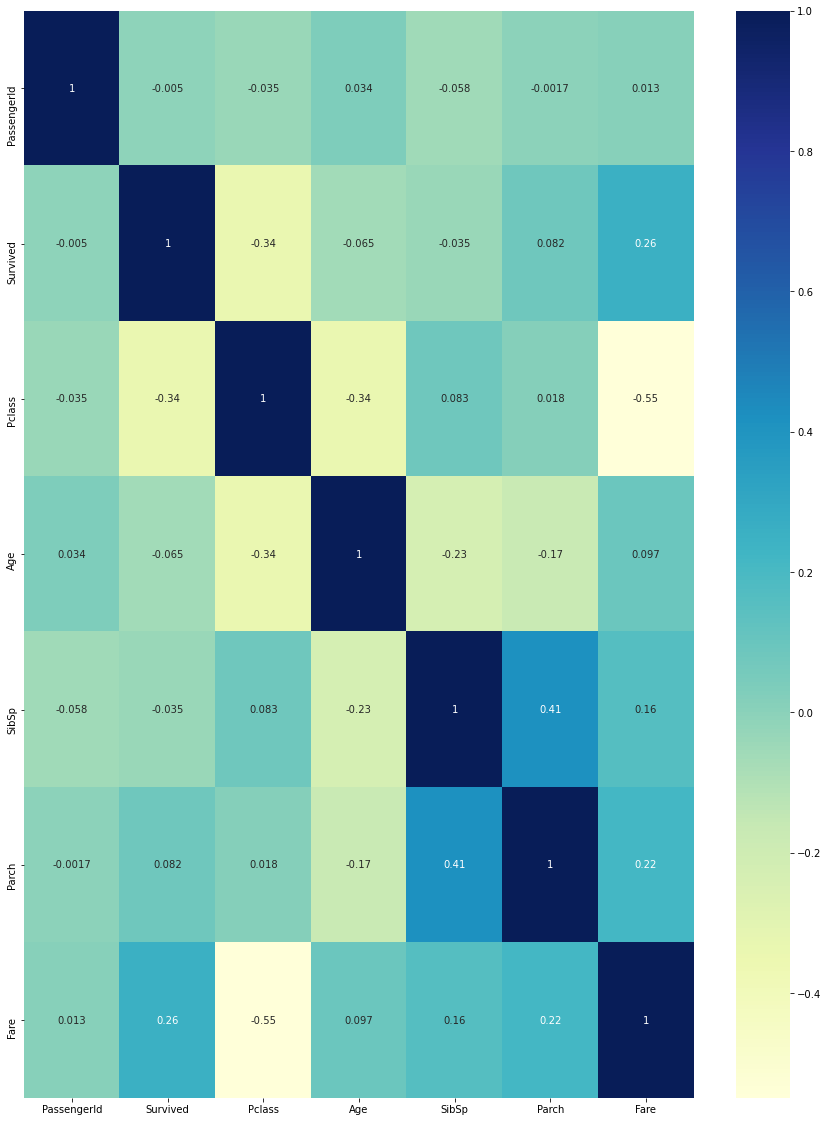

In [154]:
# using Corelation matrix with heat map to get feature corelation with Target

corr_matrix =df.corr()
fig,ax =plt.subplots(figsize=(15,20))
ax=sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu");

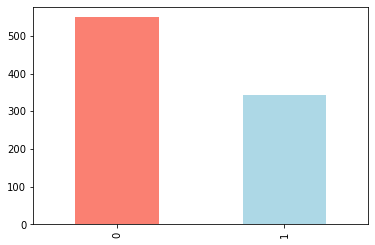

In [11]:
df.Survived.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

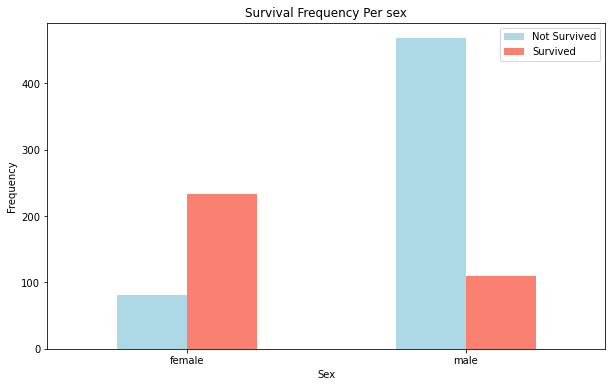

In [13]:
pd.crosstab(df.Sex,df.Survived).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])
plt.title("Survival Frequency Per sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.legend(["Not Survived", "Survived"])
plt.xticks(rotation = 0);

From the graph we can conclude that male have very high chances of not surviving out of the titanic . 

We can also conclude from graph that overall population of female in titanic is twice less as that of the male population on the ship.

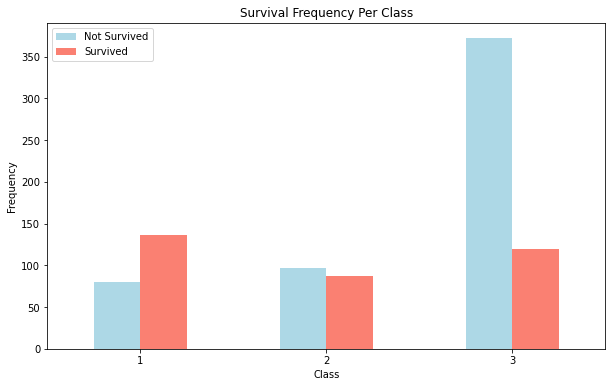

In [14]:
pd.crosstab(df.Pclass,df.Survived).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])
plt.title("Survival Frequency Per Class")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.legend(["Not Survived", "Survived"])
plt.xticks(rotation = 0);

From the graph we can conclude that people boarded in 3rd class are at high risk of not surviving .

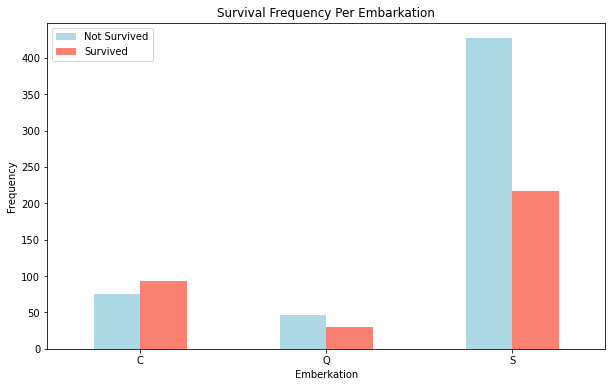

In [15]:
pd.crosstab(df.Embarked,df.Survived).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])
plt.title("Survival Frequency Per Embarkation")
plt.xlabel("Emberkation")
plt.ylabel("Frequency")
plt.legend(["Not Survived", "Survived"])
plt.xticks(rotation = 0);

People who have embarked for southampton are affected the most

In [80]:
# checking for missing values - no missing values found

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

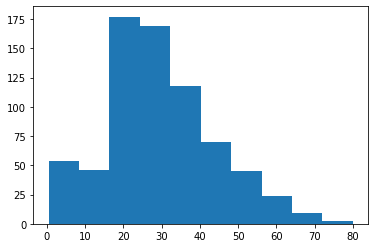

In [33]:
fig, ax = plt.subplots()
ax.hist(df["Age"]);

In [226]:
# getting the non numerical features

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [227]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


In [272]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [273]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [230]:
# Check for which non numeric columns have null values
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Cabin
Embarked


We have decided to leave out Cabin as they have less importance with respect to survival also two rows which have blank data for embarkation are also need to removed as they dont have any coincidence with other passengers to update its detail for embarkation.

In [274]:
df_tmp=df.drop("Cabin",axis=1)

In [275]:
df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [276]:
df_tmp.dropna(subset = ["Embarked"], inplace=True)

In [277]:
# Check for which non numeric columns have null values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [278]:
# getting the non numerical features

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Embarked


In [279]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [280]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    int16  
 4   Sex          889 non-null    int8   
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    int16  
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int8   
dtypes: float64(2), int16(2), int64(5), int8(2)
memory usage: 60.8 KB


In [238]:
df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,109,2,22.0,1,0,523,7.2500,3
1,2,1,1,191,1,38.0,1,0,596,71.2833,1
2,3,1,3,354,1,26.0,0,0,669,7.9250,3
3,4,1,1,273,1,35.0,1,0,49,53.1000,3
4,5,0,3,16,2,35.0,0,0,472,8.0500,3


In [239]:
df_tmp.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [281]:
df_tmp = pd.get_dummies(df_tmp, columns = ['Pclass', 'Sex', 'Embarked'])

In [282]:
x_train=df_tmp.drop(["PassengerId","Name","Ticket","Survived","Age"],axis=1)
y_train=df_tmp.Survived


In [283]:
# importing testing dataset 

df_test = pd.read_csv("./data/test.csv")

In [243]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [101]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [244]:
# getting the non numerical features

for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [245]:
# Check for which numeric columns have null values
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
Fare


In [284]:
# Fill numeric rows with the median
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median
            df_test[label] = content.fillna(content.median())

In [285]:
# Check for which numeric columns have null values
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [286]:
# Check for which non numeric columns have null values
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Cabin


In [287]:
df_test_tmp=df_test.drop("Cabin",axis=1)

In [288]:
# Check for which non numeric columns have null values
for label, content in df_test_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [289]:
df_test_tmp.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [147]:
df_test_tmp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [252]:
# getting the non numerical features

for label, content in df_test_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Sex
Ticket
Embarked


In [290]:
# Turn categorical variables into numbers and fill missing
for label, content in df_test_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_test_tmp[label] = pd.Categorical(content).codes+1

In [291]:
df_test_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int16  
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int16  
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int8   
dtypes: float64(2), int16(2), int64(4), int8(2)
memory usage: 22.2 KB


In [292]:
df_test_tmp = pd.get_dummies(df_test_tmp, columns = ['Pclass', 'Sex', 'Embarked'])

In [293]:
x_test=df_test_tmp.drop(["PassengerId","Name","Ticket","Age"],axis=1)



In [294]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "LSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [295]:
# Create function to fit and score models
def fit_and_score(models, x_train, y_train):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [296]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             y_train=y_train)
model_scores

C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'Logistic Regression': 0.7997750281214848,
 'LSVC': 0.7862767154105736,
 'KNN': 0.8346456692913385,
 'Random Forest': 0.9246344206974129}

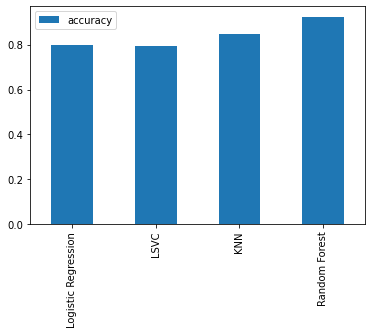

In [260]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [297]:
# Predicting the cross val
def fit_and_find(models, x_train, y_train):
    np.random.seed(42)
    model_finds = {}
    model_rep = ['accuracy','precision','recall','f1']
    for name,model in models.items():
        model.fit(x_train,y_train)
        for rep in model_rep:
            a=np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring=rep))
            model_finds[name+" "+rep]=a
    return model_finds



In [298]:
model_find = fit_and_find(models=models,
                          x_train=x_train,
                             y_train=y_train)
model_find

C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_proj

{'Logistic Regression accuracy': 0.7885545610359931,
 'Logistic Regression precision': 0.7456802124603982,
 'Logistic Regression recall': 0.6823529411764706,
 'Logistic Regression f1': 0.7114823817310418,
 'LSVC accuracy': 0.7458071478448549,
 'LSVC precision': 0.695940511111744,
 'LSVC recall': 0.7029411764705882,
 'LSVC f1': 0.6300988649483246,
 'KNN accuracy': 0.7649082714403606,
 'KNN precision': 0.7188122486854315,
 'KNN recall': 0.6323529411764706,
 'KNN f1': 0.6720526149604262,
 'Random Forest accuracy': 0.79417888656129,
 'Random Forest precision': 0.7596171802054155,
 'Random Forest recall': 0.6882352941176471,
 'Random Forest f1': 0.7176789540425903}

In [196]:
def fit_and_find_auc(models, x_train, y_train):
    np.random.seed(42)
    model_finds_auc = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        plot_roc_curve(model, x_train, y_train)
    return plot_roc_curve

C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


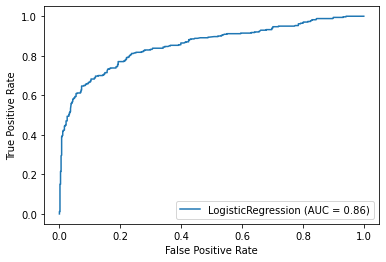

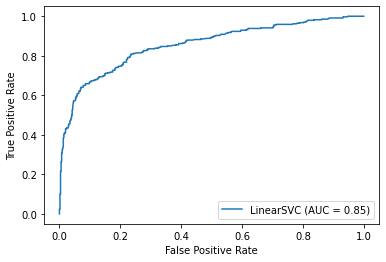

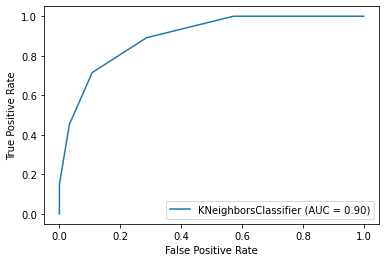

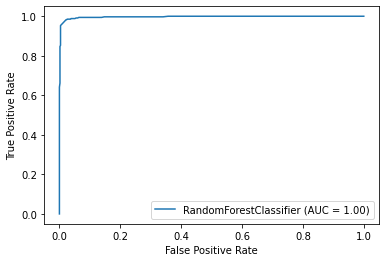

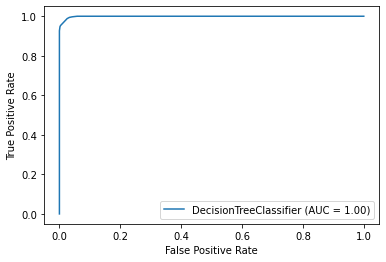

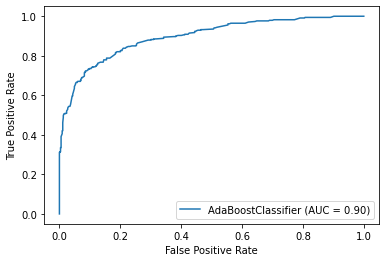

In [197]:
model_find_auc = fit_and_find_auc(models=models,x_train=x_train,
                             y_train=y_train)

In [204]:
# creating grid for hyperparameters for randomizedsearchCV on each model

def fit_and_find_rscv(models,x_train, y_train,total_grid):
    np.random.seed(42)
    model_finds_rscv = {}
    for name,model in models.items():
        rs_log_reg = RandomizedSearchCV(model,
                                param_distributions=total_grid[name],
                                cv=5,
                                n_iter=20,
                                verbose=True)
        rs_log_reg.fit(x_train, y_train)
        model_finds_rscv[name]=rs_log_reg.best_params_
    return model_finds_rscv

In [207]:
log_rs_grid={"penalty":["l1", "l2"],
        "C": [0,1.0,2.0],
        "solver": ["sag","liblinear"],
        "max_iter":[10,20,50,100,200]}


ran_rs_grid={"n_estimators": np.arange(10, 1000, 50),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2)}

lin_rs_grid={"penalty":["l1", "l2"],
        "loss":["hinge", "squared_hinge"],
        "C": [0,1.0,2.0],
        "max_iter":[200,500,1000,1200]}


knn_rs_grid={"n_neighbors": [2,10,12,15],
        "weights":["uniform", "distance"],
        "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}

ada_rs_grid={"n_estimators": np.arange(10, 1000, 50)}
                     
total_grid={"Logistic Regression":log_rs_grid,
            "Random Forest":ran_rs_grid,
            "LSVC":lin_rs_grid,
            "KNN":knn_rs_grid,
            "Adaboost":ada_rs_grid}

model_find_rscv = fit_and_find_rscv(models=models,
                                    x_train=x_train,
                          y_train=y_train,
                          total_grid=total_grid)
model_find_rscv

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partiti

C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this trai

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Libl

C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this tr

C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_proj

C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\titanic_proj

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished


{'Logistic Regression': {'solver': 'liblinear',
  'penalty': 'l2',
  'max_iter': 50,
  'C': 1.0},
 'LSVC': {'penalty': 'l2',
  'max_iter': 1000,
  'loss': 'squared_hinge',
  'C': 1.0},
 'KNN': {'weights': 'distance', 'n_neighbors': 12, 'algorithm': 'brute'},
 'Random Forest': {'n_estimators': 110,
  'min_samples_split': 4,
  'min_samples_leaf': 3,
  'max_depth': None}}

In [299]:
model_forest=RandomForestClassifier(n_estimators = 110,min_samples_split = 4,min_samples_leaf = 3,max_depth = None)
model_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [300]:
model=RandomForestClassifier(n_estimators = 110,min_samples_split = 4,min_samples_leaf = 3,max_depth = None)
model_rep = ['accuracy','precision','recall','f1']
model.fit(x_train,y_train)
for rep in model_rep:
    a=np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring=rep))
    print(a)


0.8054148416174696
0.798645031783205
0.6647058823529411
0.7251271606612407


In [301]:
model_forest=RandomForestClassifier(n_estimators = 110,min_samples_split = 4,min_samples_leaf = 3,max_depth = None)
model_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [302]:
y_preds=model_forest.predict(x_test)

In [304]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["PassengerId"] = df_test["PassengerId"]
df_preds["Survived"] = y_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [305]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv", index=False)

In [266]:
x_test.shape,x_train.shape

((418, 24), (889, 23))

In [267]:
x_test.columns

Index(['Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Sex_2',
       'Embarked_1', 'Embarked_2', 'Embarked_3', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Parch_9'],
      dtype='object')

In [268]:
x_train.columns

Index(['Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Sex_2',
       'Embarked_1', 'Embarked_2', 'Embarked_3', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6'],
      dtype='object')